In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
import keras
from sklearn.metrics import confusion_matrix
import seaborn as sns
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

In [ ]:
# Read data
df = pd.read_csv('/content/drive/MyDrive/Finalterm ANN/dataset/data_train.csv', index_col='Case ID')
df

,firstorder_Energy,firstorder_Entropy,firstorder_InterquartileRange,firstorder_Kurtosis,firstorder_Maximum,firstorder_MeanAbsoluteDeviation,firstorder_Mean,firstorder_Median,firstorder_Minimum,firstorder_Range,...,MYO10,NAA25,NOP56,PTGES3,RBMS3,RICTOR,SNORA37,SPG7,TXNIP,Recurrence
Case ID,,,,,,,,,,,,,,,,,,,,,
R01-018,0.993482,-2.275223,-1.470024,0.888727,-0.869157,-1.485872,-1.063761,-1.015433,-0.187001,-0.817701,...,1.561908,-0.455716,-0.421550,-0.321941,-0.220058,0.952648,0.012488,0.303651,-0.435825,1.0
R01-125,-0.842128,-0.265020,-0.379835,-0.044889,-0.448525,-0.528907,-1.041381,-1.053322,-0.187001,-0.411153,...,-0.474845,0.011543,-0.329021,0.656408,0.514828,3.338975,-0.872046,1.578542,2.480218,1.0
R01-060,-0.554524,0.712968,0.443862,-0.532438,0.819466,0.858742,-0.059605,-0.257659,-0.187001,0.814383,...,0.706650,-0.168679,-0.459502,-0.030650,6.640387,0.654045,-0.151310,-0.270280,0.545900,0.0
R01-043,-0.158993,-0.895588,-0.864363,-0.289827,-1.372086,-0.639766,-0.306686,-0.352381,-0.063783,-1.318520,...,-0.150054,-0.155089,-0.134998,0.006263,-0.155743,-0.127561,8.354595,-0.150580,-0.053403,0.0
R01-117,1.211076,0.413246,0.371183,0.281937,0.984061,0.631065,-0.584266,-0.769157,-0.187001,0.973467,...,-0.168212,-0.267919,-0.260545,-0.210073,-0.005162,0.553137,7.745574,0.024467,0.635789,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
R01-136,-1.019599,-0.036631,-0.549420,-0.630734,-0.448525,0.327717,0.242152,-0.011383,0.108722,-0.446505,...,-0.163125,-0.152827,-0.210640,-0.200984,2.029580,0.114707,8.023326,-0.026989,0.500684,0.0
R01-023,-0.796209,0.935826,1.340239,-1.319601,-0.421093,0.914927,2.069064,1.939886,1.611980,-0.599697,...,-0.146423,-0.138190,-0.171574,-0.121632,0.791020,-0.018107,8.277806,-0.087724,-0.081018,0.0
R01-121,0.126303,0.352658,-0.161798,-0.014670,1.063310,0.830154,-0.303144,-0.636546,-0.187001,1.050063,...,-0.145995,-0.126916,-0.132477,-0.064729,-0.124131,-0.002086,8.362209,-0.109957,0.023512,0.0


In [ ]:
X = df.drop(['Recurrence'], axis=1)
X

,firstorder_Energy,firstorder_Entropy,firstorder_InterquartileRange,firstorder_Kurtosis,firstorder_Maximum,firstorder_MeanAbsoluteDeviation,firstorder_Mean,firstorder_Median,firstorder_Minimum,firstorder_Range,...,MCM7,MYO10,NAA25,NOP56,PTGES3,RBMS3,RICTOR,SNORA37,SPG7,TXNIP
Case ID,,,,,,,,,,,,,,,,,,,,,
R01-018,0.993482,-2.275223,-1.470024,0.888727,-0.869157,-1.485872,-1.063761,-1.015433,-0.187001,-0.817701,...,-0.064860,1.561908,-0.455716,-0.421550,-0.321941,-0.220058,0.952648,0.012488,0.303651,-0.435825
R01-125,-0.842128,-0.265020,-0.379835,-0.044889,-0.448525,-0.528907,-1.041381,-1.053322,-0.187001,-0.411153,...,-0.389979,-0.474845,0.011543,-0.329021,0.656408,0.514828,3.338975,-0.872046,1.578542,2.480218
R01-060,-0.554524,0.712968,0.443862,-0.532438,0.819466,0.858742,-0.059605,-0.257659,-0.187001,0.814383,...,-0.553463,0.706650,-0.168679,-0.459502,-0.030650,6.640387,0.654045,-0.151310,-0.270280,0.545900
R01-043,-0.158993,-0.895588,-0.864363,-0.289827,-1.372086,-0.639766,-0.306686,-0.352381,-0.063783,-1.318520,...,-0.143326,-0.150054,-0.155089,-0.134998,0.006263,-0.155743,-0.127561,8.354595,-0.150580,-0.053403
R01-117,1.211076,0.413246,0.371183,0.281937,0.984061,0.631065,-0.584266,-0.769157,-0.187001,0.973467,...,-0.187132,-0.168212,-0.267919,-0.260545,-0.210073,-0.005162,0.553137,7.745574,0.024467,0.635789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
R01-136,-1.019599,-0.036631,-0.549420,-0.630734,-0.448525,0.327717,0.242152,-0.011383,0.108722,-0.446505,...,-0.227401,-0.163125,-0.152827,-0.210640,-0.200984,2.029580,0.114707,8.023326,-0.026989,0.500684
R01-023,-0.796209,0.935826,1.340239,-1.319601,-0.421093,0.914927,2.069064,1.939886,1.611980,-0.599697,...,-0.190220,-0.146423,-0.138190,-0.171574,-0.121632,0.791020,-0.018107,8.277806,-0.087724,-0.081018
R01-121,0.126303,0.352658,-0.161798,-0.014670,1.063310,0.830154,-0.303144,-0.636546,-0.187001,1.050063,...,-0.123487,-0.145995,-0.126916,-0.132477,-0.064729,-0.124131,-0.002086,8.362209,-0.109957,0.023512


In [ ]:
y = df['Recurrence']
y

Case ID
R01-018    1.0
R01-125    1.0
R01-060    0.0
R01-043    0.0
R01-117    0.0
          ... 
R01-136    0.0
R01-023    0.0
R01-121    0.0
R01-069    0.0
R01-131    0.0
Name: Recurrence, Length: 107, dtype: float64

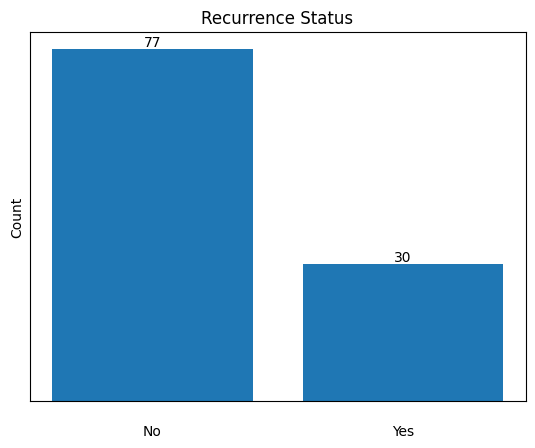

In [ ]:
value_counts = y.value_counts()
labels = ['No', 'Yes']  
plt.bar(value_counts.index, value_counts.values)
plt.ylabel('Count')
plt.title('Recurrence Status')
plt.xticks([])
plt.yticks([])
for i, v in enumerate(value_counts.values):
    plt.text(i, v, str(v), ha='center', va='bottom')
    plt.text(i, -5, labels[i], ha='center', va='top')
plt.show()

In [ ]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X, y, test_size=0.1, random_state=1)

In [ ]:
# Apply undersampling and oversampling techniques to balance the dataset
steps = [
    ('under', RandomUnderSampler()),
    ('over', SMOTE())
]

pipeline = Pipeline(steps=steps)

X_train, Y_train = pipeline.fit_resample(X_train, Y_train)

In [ ]:
Y_train_encoded = to_categorical(Y_train)
Y_valid_encoded = to_categorical(Y_valid)

In [ ]:
model = Sequential()

model.add(Dense(100, activation='relu', input_dim=176))
model.add(Dropout(0.5))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_70"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_224 (Dense)           (None, 100)               17700     
                                                                 
 dropout_154 (Dropout)       (None, 100)               0         
                                                                 
 dense_225 (Dense)           (None, 200)               20200     
                                                                 
 dropout_155 (Dropout)       (None, 200)               0         
                                                                 
 batch_normalization_101 (Ba  (None, 200)              800       
 tchNormalization)                                               
                                                                 
 dense_226 (Dense)           (None, 2)                 402       
                                                     

Epoch 1/50
2/2 [==============================] - 1s 214ms/step - loss: 0.8275 - accuracy: 0.5600 - val_loss: 0.7390 - val_accuracy: 0.4545
Epoch 2/50
2/2 [==============================] - 0s 33ms/step - loss: 0.8889 - accuracy: 0.4400 - val_loss: 0.7376 - val_accuracy: 0.4545
Epoch 3/50
2/2 [==============================] - 0s 35ms/step - loss: 0.8018 - accuracy: 0.6000 - val_loss: 0.7335 - val_accuracy: 0.4545
Epoch 4/50
2/2 [==============================] - 0s 40ms/step - loss: 0.8249 - accuracy: 0.5400 - val_loss: 0.7332 - val_accuracy: 0.4545
Epoch 5/50
2/2 [==============================] - 0s 65ms/step - loss: 0.8715 - accuracy: 0.4200 - val_loss: 0.7313 - val_accuracy: 0.4545
Epoch 6/50
2/2 [==============================] - 0s 36ms/step - loss: 0.7148 - accuracy: 0.6600 - val_loss: 0.7280 - val_accuracy: 0.4545
Epoch 7/50
2/2 [==============================] - 0s 53ms/step - loss: 0.7550 - accuracy: 0.6600 - val_loss: 0.7269 - val_accuracy: 0.4545
Epoch 8/50
2/2 [==========

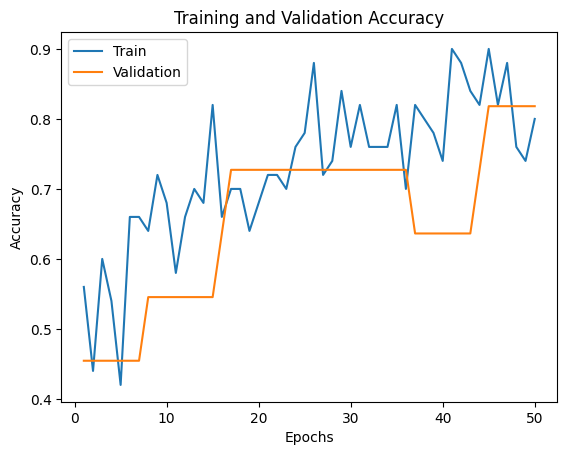

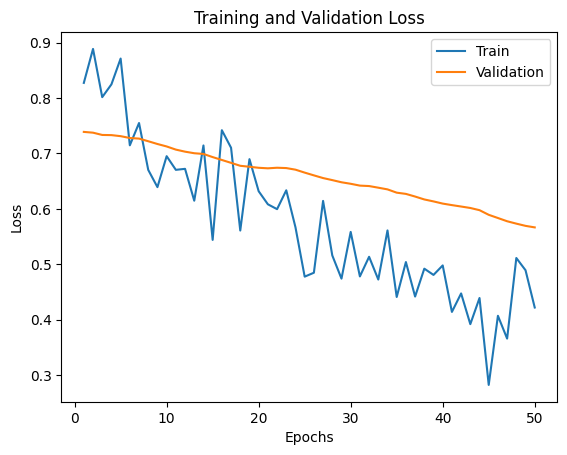

In [ ]:
history = model.fit(X_train, Y_train_encoded, validation_data=(X_valid, Y_valid_encoded), epochs=50, batch_size=32)

# Take information from training history
train_accuracy = history.history['accuracy']
valid_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
valid_loss = history.history['val_loss']

# Graph the accuracy
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Train')
plt.plot(range(1, len(valid_accuracy) + 1), valid_accuracy, label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Graph the error
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Train')
plt.plot(range(1, len(valid_loss) + 1), valid_loss, label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


1/1 [==============================] - 0s 120ms/step
Accuracy: 0.8181818181818182
Precision: 0.8
Recall: 0.8
F1-score: 0.8000000000000002


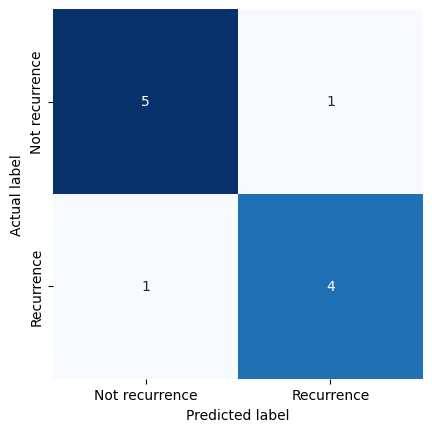

In [ ]:
y_predicted_ = np.argmax(model.predict(X_valid) > 0.5, axis=1)
Y_valid_encoded_ = np.argmax(Y_valid_encoded, axis=1)
mat = confusion_matrix(Y_valid_encoded_, y_predicted_)

accuracy = accuracy_score(Y_valid_encoded_, y_predicted_)
precision = precision_score(Y_valid_encoded_, y_predicted_)
recall = recall_score(Y_valid_encoded_, y_predicted_)
f1 = f1_score(Y_valid_encoded_, y_predicted_)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

labels = ['Not recurrence', 'Recurrence']
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()

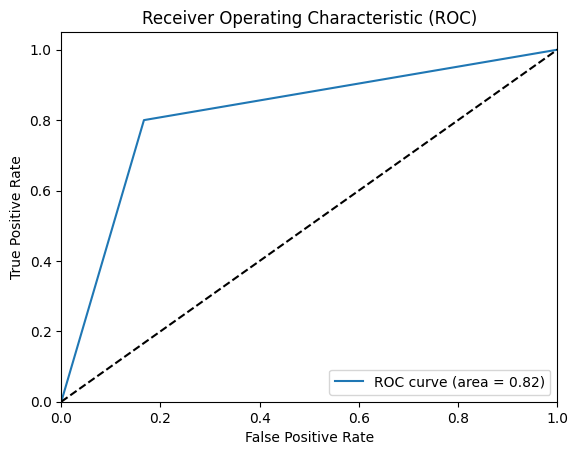

In [ ]:
from sklearn.metrics import roc_curve, auc

# Positive rate (fpr) and true positive rate (tpr)
fpr, tpr, thresholds = roc_curve(Y_valid_encoded_, y_predicted_)

# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Draw AUC-ROC graph
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#model.save('/content/drive/MyDrive/Finalterm ANN/model.h5')